<a href="https://colab.research.google.com/github/Vukasin00/IT-26-2019-Vukasin-Stanisic/blob/master/Vukasin_Stanisic_IT26_2019_PPPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Student: Vukašin Stanišić IT26/2019**

**Tema: Generative Adversarial Networks - GAN**

**Predmet: Principi prezentacije i prepoznavanja oblika**

Uvod
Generative Adversarial Network (GAN) je vrsta veštačke neuronske mreže koja se koristi za generisanje novih podataka, poput slika, zvukova ili teksta. Ova mreža se sastoji iz dva glavna dela: generatora i diskriminatora, koji se međusobno nadmeću kako bi postigli bolje rezultate.

1. **Generator**: Generator ima zadatak da stvori nove podatke. Na primer, ako govorimo o generisanju slika, generator stvara slike koje bi trebalo da izgledaju kao prave, iako su zapravo potpuno veštački generisane. Generator počinje sa nasumičnim šumom i postepeno ga transformiše u podatke koji sve više liče na stvarne.

2. **Diskriminator**: Diskriminator je kao "detektor laži". On dobija prave podatke (na primer, prave slike) i podatke koje je generisao generator. Diskriminator se uči kako da razlikuje prave podatke od onih koje je generisao generator. Cilj mu je da što bolje prepozna razliku između ta dva tipa podataka.

Proces rada GAN-a se odvija kroz iteracije, gde generator i diskriminator kontinuirano poboljšavaju svoje sposobnosti. Generator postaje sve bolji u stvaranju verodostojnih podataka, dok diskriminator postaje sve bolji u razlikovanju pravih podataka od lažnih.

Sama bit "adversarialnog" (nadmetanja) u GAN-u proizlazi iz činjenice da su generator i diskriminator u suštini u konkurenciji. Generator se trudi da stvori što bolje podatke kako bi "prevario" diskriminatora da pomisli da su generisani podaci stvarni. Sa druge strane, diskriminator se trudi da što tačnije razlikuje prave podatke od generisanih i tako "nauči" generatora da generiše autentičnije podatke.

Kroz ovu igru nadmetanja, GAN postiže sve bolje rezultate u generisanju realističnih podataka, bilo da je reč o slikama ljudi, zgrada, mačaka, ili čemu god da je naučen da generiše. GAN-i su se pokazali veoma korisnim u umetničkim kreacijama, obradi slika, generisanju teksta i mnogim drugim aplikacijama.

Generative Adversarial Network (GAN) je sofisticirana duboka neuronska mreža koja se sastoji iz dva ključna elementa: generatora i diskriminatora, koji su u stalnoj igri nadmetanja kako bi postigli sve bolje rezultate u generisanju uverljivih podataka.

Proces funkcionisanja GAN-a:

Korak 1 - Inicijalizacija i obuka:

Generator uzima slučajni signal buke kao ulaz i koristi ga da generiše slike, koje se potom koriste za obuku diskriminatora.
Diskriminator prima stvarne slike i slike generisane od strane generatora. Njegova uloga je da oceni verovatnoću da li je dana slika stvarna ili generisana.
Na početku, diskriminator daje relativno visoke verovatnoće za obe vrste slika, jer je u početnoj fazi treninga. Greška se računa poređenjem procenjenih vrednosti sa stvarnim vrednostima i ta greška se propagira unazad kroz diskriminator radi ažuriranja težina.
Korak 2 - Poboljšanje generatora:

Uzimamo niz slika koje je generator prethodno stvorio i dovodimo ih ponovo kroz diskriminator, ali ovog puta ne dajući diskriminatoru informacije o stvarnim slikama.
Generator pokušava da poboljša svoje performanse tako što "vara" diskriminatora da veruje da su njegove generisane slike stvarne. To postiže tako što prilagođava svoj izlaz kako bi minimizirao grešku diskriminatora.
Diskriminator sada izdaje izlazne verovatnoće za generisane slike. Greška se ponovo računa i propagira unazad kroz generator radi ažuriranja težina.
Korak 3 - Postizanje ravnoteže:

Proces iteracija se nastavlja, i generator i diskriminator postaju sve veštiji u svom zadatku.
Cilj je dostići tačku u kojoj su generisane slike toliko uverljive da čak ni diskriminator ne može pouzdano razlikovati stvarne slike od generisanih.
Primena GAN-a:

Generisanje slika: GAN može stvoriti realistične slike ljudi, životinja ili objekata.
Modifikacija slika: Može transformisati postojeće slike u nešto novo.
Super rezolucija: Povećava rezoluciju slika.
Umetnička podrška: Pomaže umetnicima u stvaranju novih dela.
Generisanje govora: GAN može generisati ljudski govor sa određenim osobinama.
Starenje lica: Može vizualizovati kako će nečije lice izgledati tokom godina.
Sveukupno, GAN predstavlja inovativan pristup generisanju autentičnih podataka, čime otvara mnoge mogućnosti u oblastima umetnosti, obrade slika i drugim kreativnim i tehničkim domenima.

GAN SLIKA
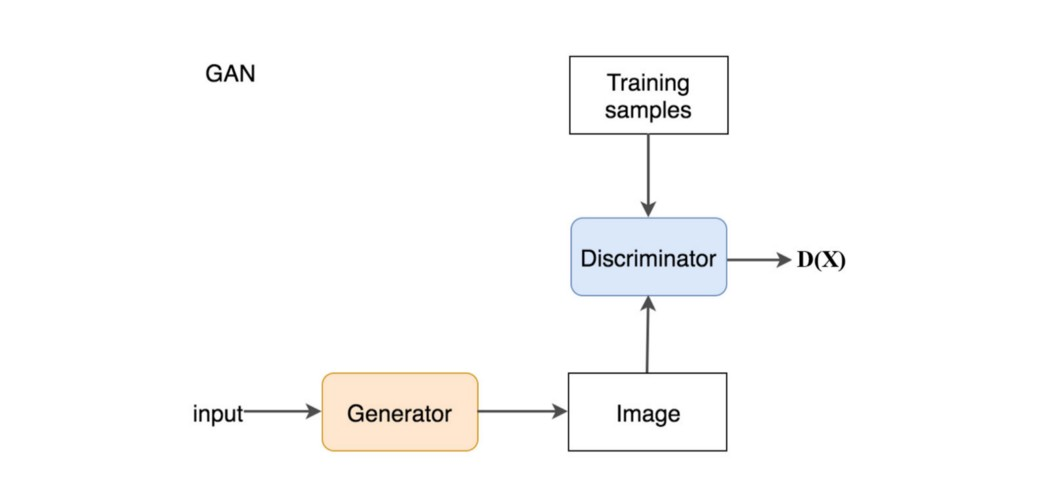

Set podataka
Ova naredba se koristi za preuzimanje datoteke koje nazivam podaci.zip sa Google Drive-a. Koristi se tehnika za automatsko preuzimanje koristeći kolačiće i potvrdu preuzimanja kako bi se izbeglo ručno integrisanje sa stranicom preuzimanja.

In [1]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1YbZ6ttxH2L-BBzDUfxI0KVibyLdri5Wc' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1YbZ6ttxH2L-BBzDUfxI0KVibyLdri5Wc" -O podaci.zip && rm -rf /tmp/cookies.txt

--2023-08-26 12:47:30--  https://docs.google.com/uc?export=download&confirm=t&id=1YbZ6ttxH2L-BBzDUfxI0KVibyLdri5Wc
Resolving docs.google.com (docs.google.com)... 108.177.98.139, 108.177.98.113, 108.177.98.101, ...
Connecting to docs.google.com (docs.google.com)|108.177.98.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-9s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c05o222455rff01lj45af95vt27smr80/1693054050000/12172178362461080244/*/1YbZ6ttxH2L-BBzDUfxI0KVibyLdri5Wc?e=download&uuid=07e33b67-d54c-4001-8e3c-42f4a2274fa2 [following]
--2023-08-26 12:47:30--  https://doc-0g-9s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c05o222455rff01lj45af95vt27smr80/1693054050000/12172178362461080244/*/1YbZ6ttxH2L-BBzDUfxI0KVibyLdri5Wc?e=download&uuid=07e33b67-d54c-4001-8e3c-42f4a2274fa2
Resolving doc-0g-9s-docs.googleusercontent.com (doc-0g-9s-docs.googleusercontent.com)... 173.194.203.132,

In [2]:
import zipfile
from zipfile import ZipFile
import os

# Kreiranje direktorijuma
!mkdir '/vukasin_projekat_pppo/podaci'

!unzip podaci.zip
# Smeštaju se svi fajlovi iz arhive u kreirani direktorijum
with ZipFile('podaci.zip', 'r') as zipObj:
   zipObj.extractall('/vukasin_projekat_pppo/podaci/')

mkdir: cannot create directory ‘/vukasin_projekat_pppo/podaci’: No such file or directory
Archive:  podaci.zip
  inflating: LICENSE                 
  inflating: harry-potter/0001/001.jpg  
  inflating: harry-potter/0001/002.jpg  
  inflating: harry-potter/0001/003.jpg  
  inflating: harry-potter/0001/004.jpg  
  inflating: harry-potter/0001/005.jpg  
  inflating: harry-potter/0001/006.jpg  
  inflating: harry-potter/0001/007.jpg  
  inflating: harry-potter/0001/008.jpg  
  inflating: harry-potter/0001/009.jpg  
  inflating: harry-potter/0001/010.jpg  
  inflating: harry-potter/0001/011.jpg  
  inflating: harry-potter/0001/012.jpg  
  inflating: harry-potter/0001/013.jpg  
  inflating: harry-potter/0002/001.jpg  
  inflating: harry-potter/0002/002.jpg  
  inflating: harry-potter/0002/003.jpg  
  inflating: harry-potter/0002/004.jpg  
  inflating: harry-potter/0002/005.jpg  
  inflating: harry-potter/0002/006.jpg  
  inflating: harry-potter/0002/007.jpg  
  inflating: harry-potter/0002/

In [3]:
# Prikazuje se spisak fajlova i direktorijuma koji se nalaze u kreiranom direktorijumu
print(os.listdir("/vukasin_projekat_pppo/podaci/"))

['star-wars', 'jurassic-world', 'LICENSE', 'index.csv', 'marvel', 'metadata.csv', 'harry-potter', 'test', 'test.csv']


In [4]:
import os
import shutil

data_path = '/vukasin_projekat_pppo/podaci/'
izlazni_folder = '/vukasin_projekat_pppo/izlazni_folder/'

# Kreiranje izlaznog foldera
os.makedirs(izlazni_folder, exist_ok=True)

# Lista glavnih foldera za obradu
folders = ['jurassic-world', 'star-wars', 'harry-potter', 'marvel']

# Kopiranje slika iz podfoldera u izlazni folder
for folder in folders:
    folder_path = os.path.join(data_path, folder)
    for root, dirs, files in os.walk(folder_path):
        for i, file in enumerate(files):
            if file.endswith(".jpg"):
                src = os.path.join(root, file)
                dst = os.path.join(izlazni_folder, f"{folder}_{i}_{file}")
                shutil.copyfile(src, dst)

print("Sve slike su kopirane u izlazni folder:", izlazni_folder)

Sve slike su kopirane u izlazni folder: /vukasin_projekat_pppo/izlazni_folder/


In [5]:
import os

izlazni_folder = '/vukasin_projekat_pppo/izlazni_folder/'

# Lista svih slika u folderu
image_list = []

# Rekurzivno pretraživanje foldera i dodavanje slika u listu
for root, dirs, files in os.walk(izlazni_folder):
    for file in files:
        if file.endswith(".jpg"):
            image_list.append(file)

# Broj slika
num_images = len(image_list)

print("Ukupan broj slika u folderu (uključujući podfoldere):", num_images)

Ukupan broj slika u folderu (uključujući podfoldere): 94


# *Importovanje biblioteka*

In [6]:
from __future__ import print_function
import time
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm_notebook as tqdm

# *Prikaz slučajnih slika*

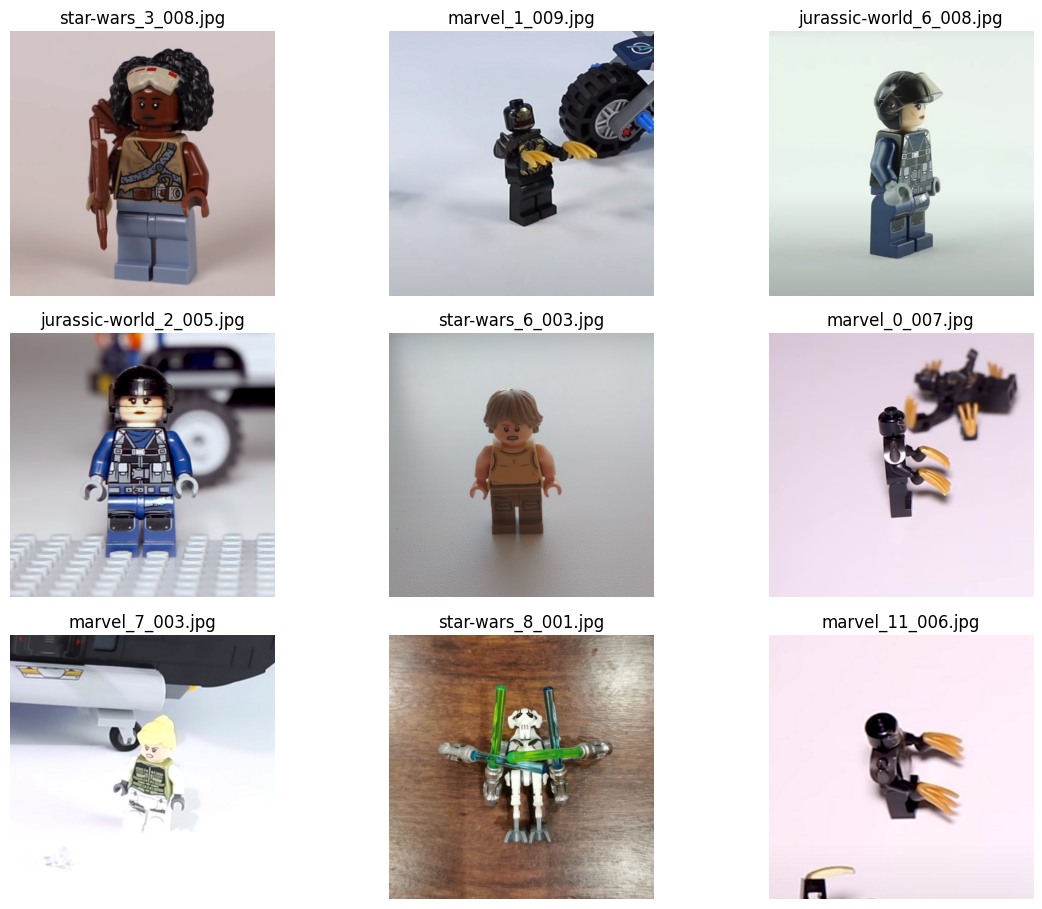

In [7]:
PATH = '/vukasin_projekat_pppo/izlazni_folder/'

# Spisak fajlova sa putanje PATH
images = os.listdir(PATH)

# Kreira se nova lista koja sadrži prvih 500 elemenata iz liste images
less_images = images[0:500:1]


# Kreiranje slikovne mreže
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,10))

# Učitavaju se nasumično izabrane slike i prikazuju se sa naslovima na odgovarajućim osama
for indx, axis in enumerate(axes.flatten()):
    rnd_indx = np.random.randint(0, len(less_images))
    img = plt.imread(PATH + less_images[rnd_indx])
    imgplot = axis.imshow(img)
    axis.set_title(less_images[rnd_indx])
    axis.set_axis_off()

# Podesavanje pozicija slika kako bi se postigao bolji prikaz
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# *Podešavanje dimenzija slika*

Ovaj dio koda definiše klasu ImageDataset koja omogućava učitavanje slika iz određenog direktorijuma i njihovo pretvaranje u oblik pogodan za dalju obradu neuronske mreže. Nakon definisanja klase, primer korišćenja demonstrira kako se koristi ovaj ImageDataset zajedno s DataLoader-om za rad sa podacima u paketima. Na kraju, ispisuje se oblik niza slika koji je izvučen iz dataloadera.

In [ ]:
# Učitavanje biblioteka i definisanje klase ImageDataset

import os
from PIL import Image
from torch.utils.data import Dataset

# Definisanje klase ImageDataset
class ImageDataset(Dataset):
    def __init__(self, root, transform=None):
        self.root = root
        self.transform = transform
        self.img_paths = self._get_img_paths() # Poziv metode za dobijanje putanja slika
        self.images = self._load_imgs() # Poziv metode za učitavanje slika

    def __getitem__(self, index):
        img = self.images[index]
        if self.transform is not None:
            img = self.transform(img)
        return img

    def __len__(self):
        return len(self.images)

    def _get_img_paths(self):
        extensions = ['.jpg', '.jpeg', '.png']
        img_paths = []
        for subdir, dirs, files in os.walk(self.root): # Prolazak kroz direktorijume i datoteke
            for file in files:
                ext = os.path.splitext(file)[1].lower()
                if ext in extensions:
                    img_paths.append(os.path.join(subdir, file)) # Dodavanje putanje slike
        return img_paths

    def _load_imgs(self):
        images = []
        for img_path in self.img_paths: # Iteracija kroz putanje slika
            try:
                img = Image.open(img_path) # Otvaranje slike
                images.append(img) # Dodavanje slike u listu
            except Exception as e:
                print(f"Error loading image: {img_path}")
                print(f"Error message: {str(e)}")
        return images

# Primer korišćenja
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset = ImageDataset(root='/vukasin_projekat_pppo/izlazni_folder', transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, shuffle=True, batch_size=32)

images = next(iter(dataloader)) # Dobijanje narednog skupa slika iz dataloadera
print(images.shape) # Ispis oblika (shape) niza slika
